In [8]:
import random as rd
import numpy as np
import scipy as sp

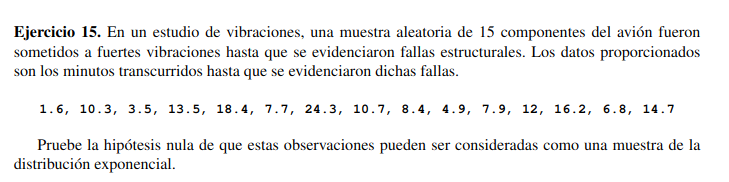

$$
H0:\text{La muestra proviene de una exponencial con parametro desconocido}
$$

In [9]:
muestra =np.array([1.6, 10.3, 3.5, 13.5, 18.4, 7.7, 24.3, 10.7, 8.4, 4.9, 7.9, 12, 16.2, 6.8, 14.7], dtype=float)

Para obtener un estimador de $\lambda$ utilizo la media muestral como estimador de la media de la exponencial, es decir $\hat{\lambda}=\frac{1}{\overline{X}}$

In [10]:
print(f"Lmabda = {round(1/np.mean(muestra),4)}")

Lmabda = 0.0932


Ahora teniendo una estimacion de los parametros de la distribucion F ~ E($\lambda$), entonces puedo calcular el estadistico de prueba:
$$
D = \max_{1 \leq j \leq n} \left\{ \frac{j}{n} - F_{\hat{\theta}}(Y_{(j)}), F_{\hat{\theta}}(Y_{(j)}) - \frac{j-1}{n} \right\}
$$

In [11]:
def estadistico_K_S_expon(data, lam=1):
    data.sort()
    n = len(data)
    D = 0
    for i in range(n):
        F_yj = sp.stats.expon.cdf(data[i], scale=1/lam)
        izq = ((i+1)/n) - F_yj
        der = F_yj - i/n
        D = max(D, izq, der)
    return D

def estadistico_K_S_uniform(data):
    data=np.sort(data) #Ordeno
    n=len(data)
    d=0
    for j in range(n):
        x=data[j]
        d=max(d ,((j+1)/n)-x , x - j/n)
    return d

In [42]:
def estimar_pvalor_param(nsims, muestra):
    lam = 1/np.mean(muestra)
    n = len(muestra)
    D0 = estadistico_K_S_expon(muestra, lam)
    hits = 0
    for i in range(nsims):
        #sim = sp.stats.expon.rvs(scale=1/lam, size=n)
        #lam_sim = 1/np.mean(sim)
        sim = np.random.uniform(0,1,n)
        #D = estadistico_K_S_expon(sim, lam_sim)
        D = estadistico_K_S_uniform(sim)
        if D > D0:
            hits += 1
    return hits/nsims

In [51]:
nsims = 1000000
pvalor = estimar_pvalor_param(nsims, muestra)
print(f"P-valor: {pvalor}")

P-valor: 0.18791


In [41]:
lam = 1/np.mean(muestra)
print(sp.stats.kstest(muestra, 'expon', args=(0,1/lam)))

KstestResult(statistic=0.26949936321059237, pvalue=0.18795096380192333, statistic_location=6.8, statistic_sign=-1)
